In [4]:
using JuMP, ECOS, Clp, SCS
using Plots

# Solution 1: Solving the problem using Clp, ECOS, and SCS solvers

In [7]:
# Solving using Clp Solver
m = Model(solver=ClpSolver())
@variable(m, 0 <= x1 <= 3)
@variable(m, 0 <= x2 <= 3)
@variable(m, 0 <= x3 <= 3)
@constraint(m, 2x1 >= x2 + x3)
@objective(m, Max, 5x1 - x2 + 11x3)
@time status=solve(m)
println("=======================================================")
println("value x1: ", getvalue(x1))
println("value x2: ", getvalue(x2))
println("value x3: ", getvalue(x3))
println("1. Maximum value (Clp Solver): \$", getobjectivevalue(m))
println("=======================================================")
println("")
##########################################################

m1 = Model(solver=ECOSSolver(verbose=0))
@variable(m1, 0 <= x1 <= 3)
@variable(m1, 0 <= x2 <= 3)
@variable(m1, 0 <= x3 <= 3)
@constraint(m1, 2x1 >= x2 + x3)
@objective(m1, Max, 5x1 - x2 + 11x3)

@time status=solve(m1)
println("=======================================================")
println("value x1: ", getvalue(x1))
println("value x2: ", getvalue(x2))
println("value x3: ", getvalue(x3))
println("2. Maximum value (ECOS Solver): \$", getobjectivevalue(m1))
println("=======================================================")
println("")
##########################################################

m2 = Model(solver=SCSSolver(verbose=0))
@variable(m2, 0 <= x1 <= 3)
@variable(m2, 0 <= x2 <= 3)
@variable(m2, 0 <= x3 <= 3)
@constraint(m2, 2x1 >= x2 + x3)
@objective(m2, Max, 5x1 - x2 + 11x3)

@time status=solve(m2)
println("=======================================================")
println("value x1: ", getvalue(x1))
println("value x2: ", getvalue(x2))
println("value x3: ", getvalue(x3))
println("3. Maximum value (SCS Solver): \$", getobjectivevalue(m2))
println("=======================================================")


  0.000750 seconds (98 allocations: 6.109 KB)
value x1: 3.0
value x2: 0.0
value x3: 3.0
1. Maximum value (Clp Solver): $48.0

  0.001839 seconds (831 allocations: 48.250 KB)
value x1: 2.999999998571697
value x2: 8.223270011736391e-9
value x3: 3.0000000001977236
2. Maximum value (ECOS Solver): $47.999999986810174

  0.001942 seconds (641 allocations: 38.102 KB)
value x1: 2.999985652990818
value x2: 4.149724928776938e-6
value x3: 3.0000130627112176
3. Maximum value (SCS Solver): $48.00006780505256


# Speculation as to why results show ClpSolver to be fastest than other two
From the results it seems that the ClpSolver gives accurate results (no floating point numbers) than other two solvers. One thing I can speculate is that ClpSolvers are mostly handling or support Linear Programming whereas other solvers are capable of solving other equations (other than Linear Programming). Also, is might be possible that language of implementation can make ClpSolver faster (C++) than other two which are written implemented in C programming language.

# Solution 2: Standard form with equality constraints.
Rather than using the standard LP form we saw in class, some prefer using a form where all variables are nonnegative, all constraints are equality constraints, and the cost function is a minimization. So a general LP would look like:

\begin{equation*}
minimize: c^Tx
\end{equation*}
\begin{equation*}
subject to: Ax = b                 
\end{equation*}
\begin{equation*}
x ≥ 0
\end{equation*}

Consider the following LP:

\begin{equation*}
maximize_{z1,z2,z3,z4}: 3z1 − z2
\end{equation*}
\begin{equation*}
subject to: −z1 + 6z2 − z3 + z4 ≥ −3
\end{equation*}
\begin{equation*}
7z2 + z4 = 5
\end{equation*}
\begin{equation*}
z3 + z4 ≤ 2
\end{equation*}
\begin{equation*}
−1 ≤ z2 ≤ 5, −1 ≤ z3 ≤ 5, −2 ≤ z4 ≤ 2
\end{equation*}

<b>Solution 1a)</b> Transform the above LP into the equality-constrained standard form of (1). What are A, b, c, and x? Be sure to explain how the decision variables of your transformed LP relate to those of the original LP.

<b>Step 1:</b> Converting the <u>maxmimization to minimization</u>: transform a maximization problem to a minimization problem by multiplying the objective function by -1. 

\begin{equation*}
maximize_{z1,z2,z3,z4}: 3z1 − z2
\end{equation*}
<b>becomes</b>:
\begin{equation*}
minimize_{z1,z2,z3,z4}: -3z1 + z2
\end{equation*}

<b>Step 2:</b> Convert the inequalities to equalities as per the required problem input and add <u>slack variable</u>: 
<li>If the equation is of the type 'less than equal to' then we <b>add a positive slack variable (say +s1)</b></li> For instance the two inequalities from the input problem: 
\begin{equation*}
−z1 + 6z2 − z3 + z4 ≥ −3 \\
7z2 + z4 = 5 \\
z3 + z4 ≤ 2 \\
\end{equation*}

<p>First converting this to 'less than eq' problem by multiplying it by -1 and then adding slack variable s1 to this equation. Similarly for the third equation - adding slack variable s2. Nothing is done for the second equation as its already in equality form.</p>
<p>
\begin{equation*}
z1 - 6z2 + z3 - z4 + s1 = 3 ........ (1) \\
7z2 + z4 = 5 ..........(2)\\
z3 + z4 + s2 = 2 .........(3)\\
\end{equation*}

<li>If the equation is of the type 'greater than equal to' then we <b>add a negative slack variable (say -s1)</b></li>

<b>Step 3:</b> Taking care of <u>free variables</u> in the equation. Here in the given problem we have z1 as free variable i.e. variable without any bounds. To obtain standard form, free variable will replaced by the difference of two non-negative variables. i.e. z1 will be replaced by (u - v) where u >= 0 and v >= 0.

<b>Step 4:</b> Taking care of variables with <u>lower bounds</u> which are not zero. Substituting variables zi by xi + li (lower bound value). 
\begin{equation*}
−1 ≤ z2 ≤ 5, −1 ≤ z3 ≤ 5, −2 ≤ z4 ≤ 2
\end{equation*}

Becomes:
\begin{equation*}
z2 = x2 - 1 \\
z3 = x3 - 1 \\
z4 = x4 - 2 \\
z2 <= 5 ......... (4)\\
z3 <= 5 ......... (5)\\
z4 <= 2 ......... (6)\\
\end{equation*}

<b>Step 5:</b> Adding slack variables for the variables which are <u>upper bounded</u>, substituting free variables and other variables as per previous steps and getting the final equations (from 1,2,3,4,5,6):
\begin{equation*}
minimize: -3(u-v) + (x2-1)
\end{equation*}
\begin{equation*}
subject to: u - v - 6x2 + x3 - x4 + s1 = -4
\end{equation*}
\begin{equation*}
7x2 + x4 = 14
\end{equation*}
\begin{equation*}
x3 + x4 + s2 = 5
\end{equation*}
\begin{equation*}
x2 + s3 = 6
\end{equation*}
\begin{equation*}
x3 + s4 = 6
\end{equation*}
\begin{equation*}
x4 + s5 = 4
\end{equation*}
\begin{equation*}
u>=0, v>=0, x2>=0, x3>=0, x4>=0, s1>=0, s2>=0, s3>=0, s4>=0, s5>=0
\end{equation*}

<br>
A = 
$\left[ \begin{array}{cccc}
u & v & x2 & x3 & x4 & s1 & s2 & s3 & s4 & s5\\
1 & -1 & -6 & 1 & -1 & 1 & 0 & 0 & 0 & 0\\
0 & 0  & 7  & 0 & 1  & 0 & 0 & 0 & 0 & 0\\
0 & 0  & 0  & 1 & 1  & 0 & 1 & 0 & 0 & 0\\
0 & 0  & 1  & 0 & 0  & 0 & 0 & 1 & 0 & 0\\
0 & 0  & 0  & 1 & 0  & 0 & 0 & 0 & 1 & 0\\
0 & 0  & 0  & 0 & 1  & 0 & 0 & 0 & 0 & 1\\ \end{array} \right]$    b = 
$\left[ \begin{array}{cccc}
-4\\
14\\
5\\
6\\
6\\
4\\ \end{array} \right]$     c = 
$\left[ \begin{array}{cccc}
-3\\
3\\
1\\
0\\
0\\
0\\
0\\
0\\
0\\
0\\ \end{array} \right]$

In [6]:
# Solution by converting it to standard form
mod2 = Model()
@variable(mod2, x2 >= 0)
@variable(mod2, x3 >= 0)
@variable(mod2, x4 >= 0)
@variable(mod2, s1 >= 0)
@variable(mod2, s2 >= 0)
@variable(mod2, s3 >= 0)
@variable(mod2, s4 >= 0)
@variable(mod2, s5 >= 0)
@variable(mod2, u >= 0)
@variable(mod2, v >= 0)
@constraint(mod2, (u-v-6x2+x3-x4+s1) == -4)
@constraint(mod2, (7x2 + x4) == 14)
@constraint(mod2, (x3 + x4 + s2) == 5)
@constraint(mod2, (x2 + s3) == 6)
@constraint(mod2, (x3 + s4) == 6)
@constraint(mod2, (x4 + s5) == 4)

@objective(mod2, Min, -3(u-v) + (x2-1))
status = solve(mod2)
println("---- Transformed Version of Linear Program ----")
println("value z1: ", getvalue(u)-getvalue(v))
println("value z2: ", getvalue(x2)-1)
println("value z3: ", getvalue(x3)-1)
println("value z4: ", getvalue(x4)-2)
println("Minimum Value: ", -getobjectivevalue(mod2))
println()

# Solution without converting it to standard form
mod2 = Model()
@variable(mod2, -1 <= z2 <= 5)
@variable(mod2, -1 <= z3 <= 5)
@variable(mod2, -2 <= z4 <= 2)
@variable(mod2, z1 >= 0)
@constraint(mod2, (-z1 + 6z2 -z3 + z4) >= -3)
@constraint(mod2, (7z2 + z4) == 5)
@constraint(mod2, (z3 + z4) <= 2)

@objective(mod2, Min, -3z1 + z2)
status = solve(mod2)
println("---- Normal Version of Linear Program ----")
println("value z1: ", getvalue(z1))
println("value z2: ", getvalue(z2))
println("value z3: ", getvalue(z3))
println("value z4: ", getvalue(z4))
println("Minimum Value: ", -getobjectivevalue(mod2))
println()

---- Transformed Version of Linear Program ----
value z1: 8.571428571428571
value z2: 0.4285714285714286
value z3: -1.0
value z4: 2.0
Minimum Value: 25.28571428571429

---- Normal Version of Linear Program ----
value z1: 8.571428571428571
value z2: 0.42857142857142855
value z3: -1.0
value z4: 2.0
Minimum Value: 25.28571428571429



# Solution 3: Crop Planning
Farmer Jane owns 45 acres of land. She is going to plant each with wheator corn. Each acre planted with wheat yields $200 profit; each with corn yields $300 profit. The labor and fertilizer used for each acre are given in the table below. One hundred workers and 120 tons of fertilizer are available.

| |Wheat | Corn
|--------------|
|Labor |3 workers |2 workers
|Fertilizer |2 tons |4 tons

Solution a) How should Jane plant her crops to maximize profit? Model and solve this problem using JuMP.

In [8]:
# Solution a) Modeling the problem using JuMP to show how Jane should plant wheat and corn to get maximum profit

mod3 = Model()

# Variables (Wheat and Corn to be >= 0)
@variable(mod3, w >= 0)
@variable(mod3, c >= 0)

# Jane owns 45 acres of land
@constraint(mod3, w + c <= 45)

# Given 100 workers and 120 tons of fertilizer
@constraint(mod3, 3w + 2c <= 100)
@constraint(mod3, 2w + 4c <= 120)

# Objective - maximum profit
@objective(mod3, Max, 200w + 300c)

status = solve(mod3)
println("Jane's Wheat(w): ", getvalue(w))
println("Jane's Corn(c) : ", getvalue(c))
println("Jane's maximum profit \$", getobjectivevalue(mod3))

Jane's Wheat(w): 19.99999999999999
Jane's Corn(c) : 20.000000000000007
Jane's maximum profit $10000.0



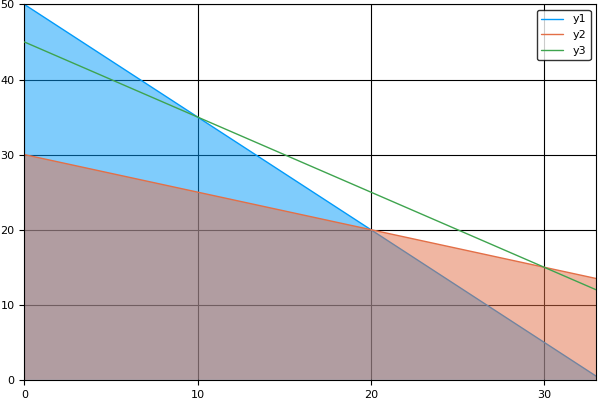

In [2]:
# Solution b)
# Plotting the initial graph with all the three equations from the problem's solution above
using Plots
f(x) = 50 - (3/2)x
g(x) = 30 - (1/2)x
h(x) = 45 - x
X = 0:33

plot(X, f, fill = (0, 0.5, :auto))
plot!(X, g, fill = (0, 0.5, :auto))
plot!(X, h)


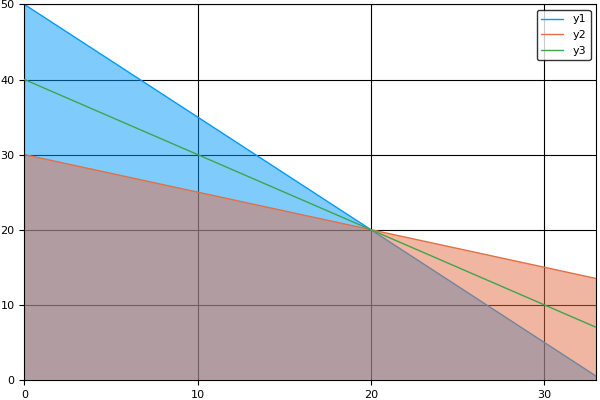

In [3]:
# Plotting the graph as to satisfy the problem given by maximizing Jane's profit. Since the line y <= 45-x has 
# a slope of -1. With same slope changing the equation y <= 45-x to get to the point where all the three lines intersect
# and we have maximum profit.
using Plots
h2(x) = 40 - x
X = 0:33
plot(X, f, fill = (0, 0.5, :auto))
plot!(X, g, fill = (0, 0.5, :auto))
plot!(X, h2)

# Solution 4: Alloy blending.
The company Steelco has received an order for 500 tons of steel to be used in shipbuilding. The steel must have the following characteristics:

|Chemical Element | Minimum Grade (%) | Maximum Grade (%)
|------------------------------------------------------|
|Carbon (C) | 2 | 3 |
|Copper (Cu) | 0.4 | 0.6 |
|Manganese (Mn) | 1.2 | 1.65 |

The company has seven different raw materials in stock that may be used for the production of this steel. The following table lists the grades, available amounts and prices for all materials:

|Raw Material |C% |Cu% |Mn% |Availability in tons |Cost in $/ton
|---------------------------------------------------------------|
|Iron alloy 1 |2.5|   |1.3|400 |200
|Iron alloy 2 |3  |   |0.8|300 |250
|Iron alloy 3 |   |0.3|   |600 |150
|Copper 1     |   |90 |   |500 |220
|Copper 2     |   |96 |4  |200 |240
|Aluminum 1   |   |0.4|1.2|300 |200
|Aluminum 2   |   |0.6|   |250 |165

Notes:
1. Let the raw materials be denoted as x1, x2, ... , x7 respectively.
2. Given Cost_for_raw_material = [200, 250, 150, 220, 240, 200, 165]
3. Availability of raw material is given as = [400, 300, 600, 500, 200, 300, 250]
4. The composition that minimizes the cost will be calculated as: $$\sum_{i=1}^7 Costi*xi$$
   i.e. minimize 200x1 + 250x2 + 150x3 + 220x4 + 240x5 + 200x6 + 165x7
5. For all element that belongs to the first table, we will have two equations 1) for minimum condition 2) for max conditions
   i.e. 6 equations mentioned below as 2 - 7

In [77]:
mod1 = Model()

# Variables x1... x7 as per the given input table
@variable(mod1, 0 <= x1 <= 400)
@variable(mod1, 0 <= x2 <= 300)
@variable(mod1, 0 <= x3 <= 600)
@variable(mod1, 0 <= x4 <= 500)
@variable(mod1, 0 <= x5 <= 200)
@variable(mod1, 0 <= x6 <= 300)
@variable(mod1, 0 <= x7 <= 250)

# Believe that the composition of x1...x7 will give atleast 500 tonnes of steel
@constraint(mod1, (x1 + x2 + x3 + x4 + x5 + x6 + x7) == 500) #...........(1)

# Constraints for each chemical element
@constraint(mod1, (2.5x1 + 3x2) >= 1000)  # .............................(2)
@constraint(mod1, (2.5x1 + 3x2) <= 1500)  # .............................(3)

@constraint(mod1, (0.3x3 + 90x4 + 96x5 + 0.4x6 + 0.6x7) >= 200) # .......(4)
@constraint(mod1, (0.3x3 + 90x4 + 96x5 + 0.4x6 + 0.6x7) <= 300) # .......(5)

@constraint(mod1, (1.3x1 + 0.8x2 + 4x5 + 1.2x6) >= 600) # ...............(6)
@constraint(mod1, (1.3x1 + 0.8x2 + 4x5 + 1.2x6) <= 825) # ...............(7)

@objective(mod1, Min, 200x1 + 250x2 + 150x3 + 220x4 + 240x5 + 200x6 + 165x7) # This is our objective

status = solve(mod1)
println("Iron Alloy1 ", getvalue(x1))
println("Iron Alloy2 ", getvalue(x2))
println("Iron Alloy3 ", getvalue(x3))
println("Copper1 ", getvalue(x4))
println("Copper2 ", getvalue(x5))
println("Aluminium1 ", getvalue(x6))
println("Aluminium2 ", getvalue(x7))
println("Minimum Cost \$", getobjectivevalue(mod1))

Iron Alloy1 400.0
Iron Alloy2 0.0
Iron Alloy3 39.77630199231043
Copper1 0.0
Copper2 2.761272282418735
Aluminium1 57.46242572527083
Aluminium2 0.0
Minimum Cost $98121.63579168123
